Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/CarPrice_Assignment.csv")

In [ ]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Exploratory data analysis

In [ ]:
corr=data.corr()

<ipython-input-8-c0bda979f113>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


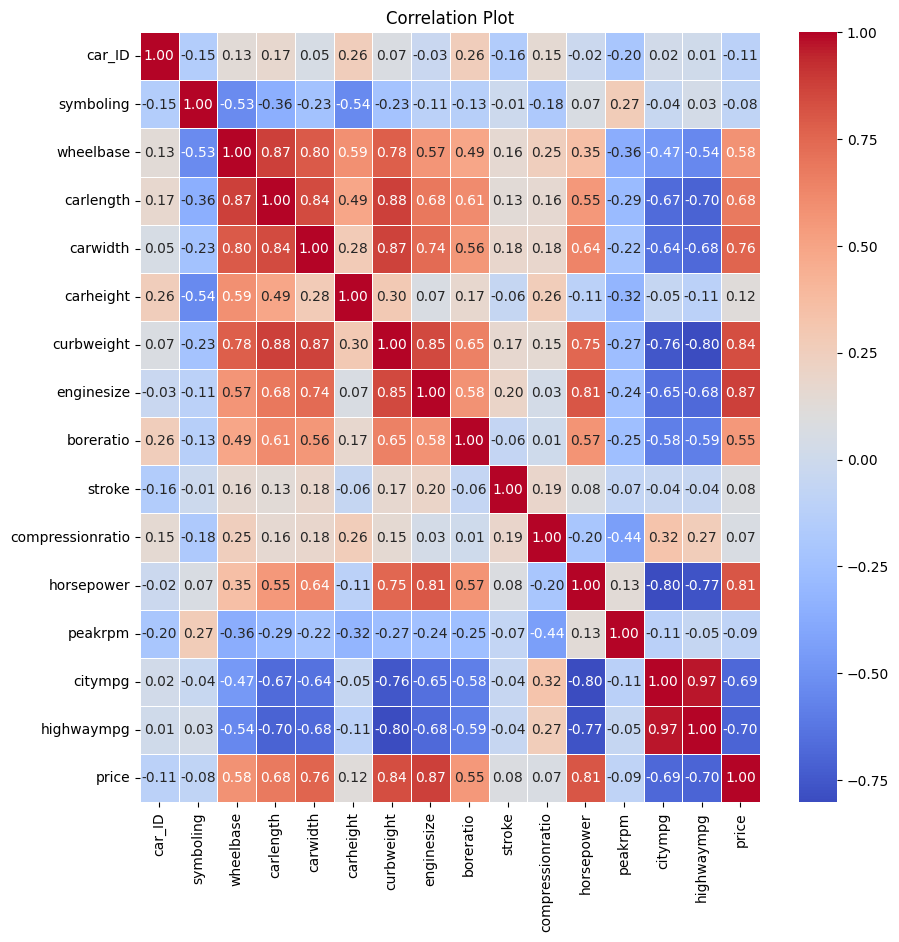

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

Price is highly correlated with carlength, carwidth, curbweight, enginesize, horsepower.

Price is less correlated with car_ID, symboling, citympg, highwaympg.

In [ ]:
data["CarName"].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

The most desired car is from toyota

Dropping Carname and Car_ID to avoid Multicollinearity

In [ ]:
data.drop(['CarName','car_ID'], axis=1, inplace=True)

In [ ]:
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
price = data['price']
fueltype = data['fueltype']

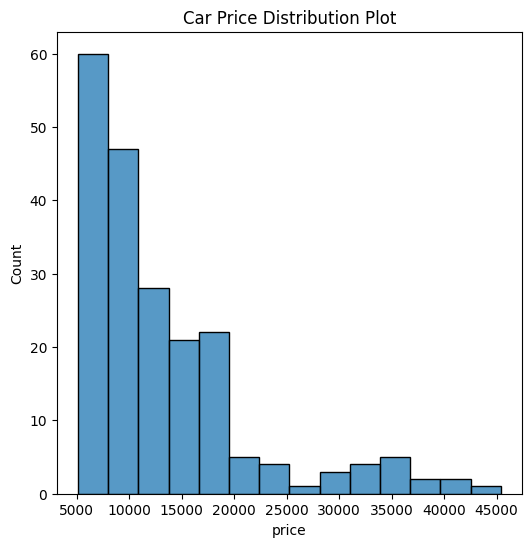

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Car Price Distribution Plot')
sns.histplot(data['price'])
plt.show()

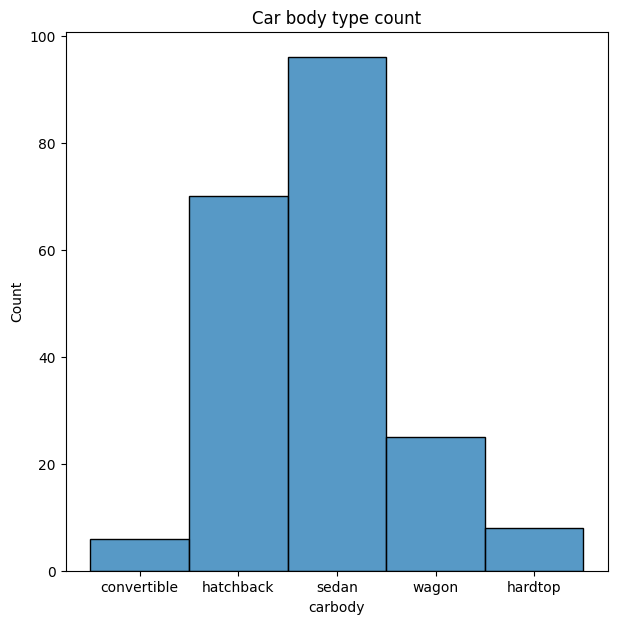

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Car body type count')
sns.histplot(data['carbody'])
plt.show()

<Figure size 2000x600 with 0 Axes>

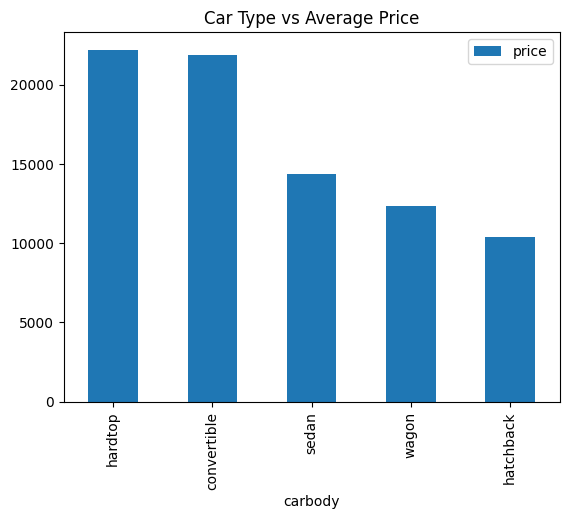

In [ ]:
plt.figure(figsize=(20, 6))
data_carbody = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
data_carbody.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Seperating numerical and categorical columns to create dummies and combine it to one single dataframe

In [ ]:
categorical_columns = []
numerical_columns = []

for column in data.columns:
    if data[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Numerical Columns: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [ ]:
data_e = data[categorical_columns]

In [ ]:
encoded_df = pd.get_dummies(data_e, columns=categorical_columns, drop_first=True)

In [ ]:
data_new = pd.concat([data, encoded_df], axis=1)

In [ ]:
data_new.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df = data_new.copy()

In [ ]:
df = df.drop(categorical_columns, axis= 1)

In [ ]:
df.shape

(205, 44)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

Testing and building model

In [ ]:
X = df.copy()
x = X.drop("price", axis=1)
X = x.iloc[:, :].values
y = df.iloc[:, 14].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Applying regression models

1. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators = 10, random_state = 0)
model1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred1 = model1.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.8988619673416123

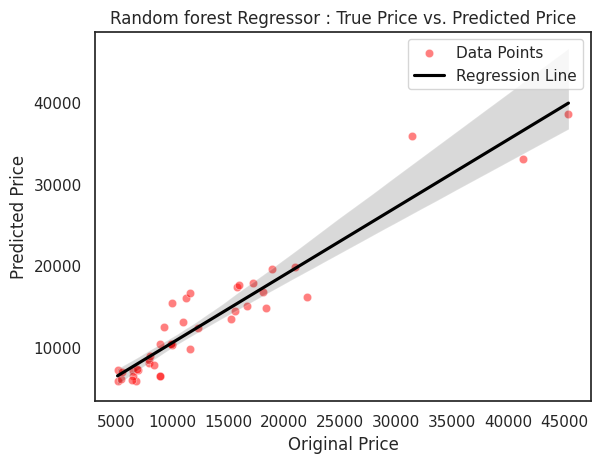

In [ ]:
sns.scatterplot(x=y_test, y=y_pred1, color='red', alpha=0.5, label='Data Points')
sns.regplot(x=y_test, y=y_pred1, color='black', scatter=False, label='Regression Line')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.title('Random forest Regressor : True Price vs. Predicted Price')
plt.legend()
plt.show()

2. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.8668850854613029

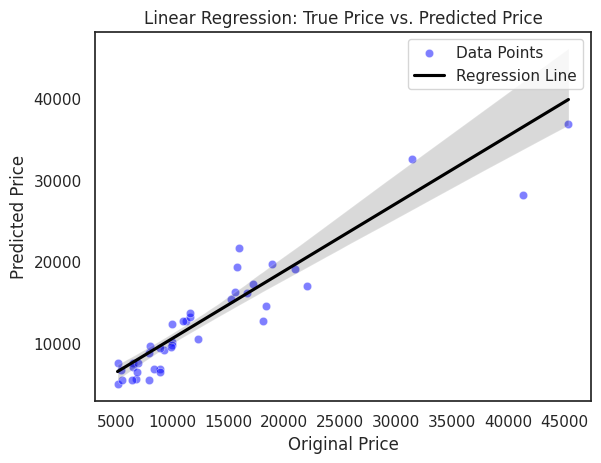

In [ ]:
sns.scatterplot(x=y_test, y=y_pred2, color='blue', alpha=0.5, label='Data Points')
sns.regplot(x=y_test, y=y_pred1, color='black', scatter=False, label='Regression Line')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: True Price vs. Predicted Price')
plt.legend()
plt.show()

3. Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor()
model3.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred3=model3.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred3)

0.8809729393285765

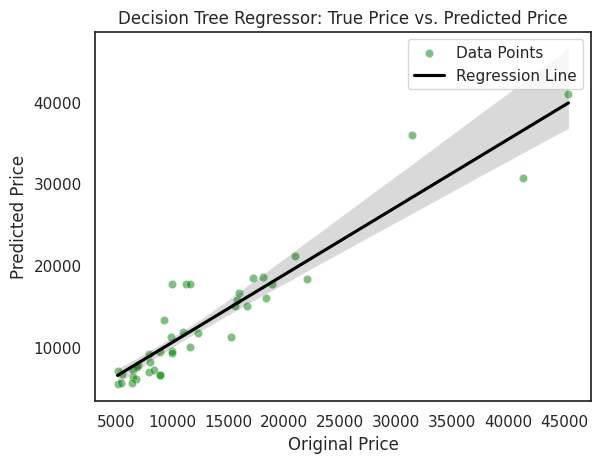

In [ ]:
sns.scatterplot(x=y_test, y=y_pred3, color='green', alpha=0.5, label='Data Points')
sns.regplot(x=y_test, y=y_pred1, color='black', scatter=False, label='Regression Line')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree Regressor: True Price vs. Predicted Price')
plt.legend()
plt.show()

4. Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

base_regressor = DecisionTreeRegressor(random_state=0)
bagging_regressor = BaggingRegressor(base_estimator=base_regressor, n_estimators=10, random_state=0)
bagging_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=0),
                 random_state=0)

In [ ]:
y_pred4 = bagging_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred4)

0.8980778923066904

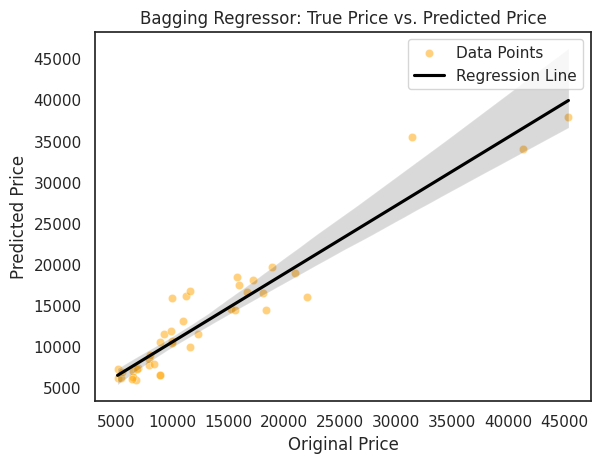

In [ ]:
sns.scatterplot(x=y_test, y=y_pred4, color='orange', alpha=0.5, label='Data Points')
sns.regplot(x=y_test, y=y_pred1, color='black', scatter=False, label='Regression Line')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.title('Bagging Regressor: True Price vs. Predicted Price')
plt.legend()
plt.show()